# Fisher information applied to FPM
According to the Cramer-Rao inequality, the covariance matrix of an estimator is bounded by the inverse of the Fisher Information Matrix (FIM)

$C(\theta) \leq \bf{I}^{-1} (\theta)$



## FIM of a Poisson
$f(x|\lambda) = \frac{\lambda^{x} e^{-\lambda}}{x!}$

In [410]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from fpmsample.simicro import SimMicroscope, NoiseModel
from fpmsample import data, shapes
from phasemath.math import SimImage
lam = 1
n=10
x = np.random.poisson(lam=lam, size=n)
# it = n*ix
ix = 1/lam
it = n/lam

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


So the CRLB for the estimators of $\lambda$ is $CRB(\lambda) = \mathcal{I}^{-1}(\lambda)=\lambda/n$

## Applied to simulated FPM images
First construct a simulated image to use in the acquisition.

1.0


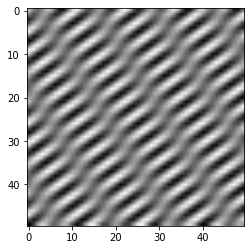

In [449]:
size = 50
simulated_image = SimImage(size=size, max_elements=2)
simimage = simulated_image.array
plt.imshow(np.real(simimage), cmap='gray', interpolation='bilinear')
print(np.imag(simimage).max())

settitn
settitn


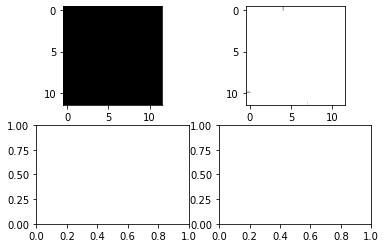

In [446]:
noise_model = NoiseModel(sigmam=[.0, .0])
cfg = data.cfg_load()
sm = SimMicroscope(noise_model=noise_model, cfg=cfg, simulated_image=simimage)
sm.generate_samples()
rm = SimMicroscope.from_dirname(dirname=sm.dirname)
delta_gk, centers = rm.get_phaseopt_input()
fig, axes = plt.subplots(2, 2)
axes[0][0].imshow(np.real(delta_gk[0]), cmap='gray', interpolation='bilinear', vmin=0, vmax=int(1E5)**2)
axes[0][1].imshow(np.real(delta_gk[10]), cmap='gray', interpolation='bilinear', vmin=0, vmax=1e5)

In [450]:
print(np.abs(delta_gk[0]).max())

1030750.3790590484


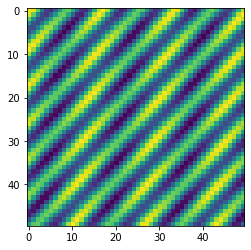

In [324]:
n=50
e = 2
t=np.linspace(0,n,n)
yy, xx = np.mgrid[:n, :n]
def random_parameters():
    amps, phases, freqs = np.random.random((3, e))
    freqs = freqs.reshape(-1,1, 1)*np.pi/4
    phases = phases.reshape(-1,1, 1)*2*np.pi
    amps = amps.reshape(-1, 1, 1)
    amps = amps*np.tile(np.ones((n, n)), (e, 1, 1))
    freqs = freqs*np.tile(np.ones((n, n)), (e, 1, 1))
    return amps, freqs, phases
xxtiled = np.tile(xx, (e, 1, 1) )
yytiled = np.tile(yy, (e, 1, 1) )
axx, fxx, pxx = random_parameters()
ayy, fyy, pyy = random_parameters()
fcns = axx*np.cos(xxtiled*fxx+pxx+yytiled*fyy+pyy)
out_fcn = np.sum(fcns, axis=0)
plt.imshow(out_fcn)
plt.show()
# amps = amps*np.ones((e, n, n))
# amps = np.tile(amps, (e, 50, 50))
# print(amps[0])
# amps*np.tile(np.ones((n, n)), (e, 1, 1))